# Lecture 10: Procesamiento de Lenguaje Natural - Natural Language Processing (NLP)

## 1. Introducción

Los computadores no son seres con inteligencia y comprensión avanzada, a menos que se les programe explícitamente para eso. Por lo general, los computadores tienden a ser bastante malos para difereciar caracteres en comparación con los humanos. Por ejemplo, para un computador la letra "a" es diferente a la letra "A". Así mismo, la frase "Bad Bunny lanzará un álbum hoy" es diferente a "bad bunny lanzará un álbum hoy". 

Probemos:

In [1]:
# Comparando una letra minúscula con la mayúscula
"a" == "A"

False

In [2]:
# Comparando una misma frase, pero con diferencias en mayúsculas
"Bad Bunny lanzará un álbum hoy" == "bad bunny lanzará un álbum hoy"

False

Los humanos son bastante buenos reconociendo que las dos frases de arriba son iguales, pero los computadores no. Por este hecho, normalmente en las bases de datos podemos encontrar errores 

en muchas ocasiones debemos ayudarle a un computador a entender nuestro lenguaje: el _lenguaje natural_. Esto se llama **Procesamiento de Lenguaje Natural**.

Para explorar esta área de la Ciencia de Datos, vamos a jugar el rol de un consultor de negocios para pequeñas y medianas empresas con un considerable número de consumidores. Algunos ejemplos de empresas que utilizan este tipo de procesamiento son empresas de moda, distribuidores de equipos para hobbies, el procesamiento de documentos legales o testimonios de víctimas del conflicto, entre muchos otros.

Algunos casos relevantes de NLP son Google, Bing, DuckDuckGo y otros motores de búsqueda para otorgar buenas respuestas a búsquedas vagas o mal escritas. También resaltan las traducciones automáticas y subtítulos generados automáticamente por YouTube.

Los usos más comunes del NLP son:

* Ayudar a los computadores a entender el habla humana (como Alexa, Siri, entre otros).
* Traducir automáticamente entre diferentes tipos de lenguajes naturales (como Google Translate).
* Aplicar automáticamente categorías para textos (como los detectores de spam o algunos algoritmos de Machine Learning e IA).
* Lectura de textos en altavoz (Kindle, Google Translate).
* Detección de emociones de textos y opiniones en redes sociales y otras páginas web.

El objetivo en este caso es manipular una base de datos de reseñas en Internet y elegir características importantes para facilitar el análisis y modelamiento de la información.

### 1.1. Retos del NLP

Los retos del procesamiento de lenguaje natural más importantes son:

* **Dimensionalidad extremadamente alta:** Don Quijote de la Mancha tiene 2'034.611 caracteres y 377.032 palabras. Si el computador considerara cada palabra como una variable (que es lo más común), sería imposible realizar un modelo con esa cantidad de variables. Ello tendría varios problemas:
    - Requeriría mucho poder computacional.
    - Acercamientos básicos de ML e IA tendrían un rendimiento terrible por la alta dimensionalidad.
    - Estos acercamientos no captarían relaciones importantes entre las palabras y no podrían diferenciar entre "don't" y "do not" en inglés.
    
* **Los textos dependen del contexto:** muchas palabras tienen un uso diferente dependiendo de dónde se utilizan. Por ejemplo, la palabra "suerte" puede significar una causa o fuerza que determina el destino de alguien, el destino mismo o, en Colombia, una manera de despedirse de alguien.

Para poder atender apropiadamente estos problemas, debemos utilizar librerías y toda _suerte_ de procesos para procesar bien este tipo de datos.

## 2. Importación de los datos

En esta ocasión, vamos a utilizar una base de datos de opiniones de Yelp!:

In [3]:
import pandas as pd
import numpy  as np

# Cargando la base de datos
data = pd.read_csv('sdata.csv')
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


Podemos ver que en esta base de datos tenemos, para cada reseña, los siguientes datos:

1. **review_id:** una identificación única para cada reseña.
2. **user_id:** un identificador anonimizado para cada usuario que escribió la reseña.
3. **business_id:** un identificador anonimizado para cada negocio al que se dirige la reseña.
4. **stars:** la calificación en estrellas que cada persona ha estipulado para calificar el negocio.
5. **date:** la fecha en la que la reseña se hizo.
6. **text:** el texto completo de la reseña.
7. **useful:** número de lectores que indicaron que la reseña fue útil.
8. **funny:** número de lectores que indicaron que la reseña es divertida o cómica.
9. **cool:** número de lectores que indicaron que la reseña es genial.

## 3. Pre-procesamiento y estandarización

Debemos estandarizar los textos o, en caso contrario, al computador le quedará difícil poder entender que algunos textos son parecidos o similares a otros (por ejemplo, entre palabras). Algunos pasos comunes para esto son:

1. **Corregir errores simples:** alguna codificación entre textos es diferente o, incluso, los acentos pueden diferir. Por ello, debemos arreglarlo.
2. **Creación de características:** en algunos casos nos conviene identificar si las palabras son sujetos o verbos, entre otros.
3. **Reemplazar palabras y oraciones completas:** algunas modificaciones de las palabras pueden hacer que se entiendan como diferentes. Por ejemplo, podemos estandarizar "horriiiiiible" por "horrible", ya que algunas personas pueden escribirlo de la primera manera.

Para esto, vamos a utilizar la librería `nltk`, la cual tiene las funciones más básicas de NLP. Otra librería útil es `spaCy`, la cual es más moderna y está más centrada en el uso práctico y avanzado en problemas de negocios. Sin embargo, `nltk` es la más útil en términos didácticos.

In [4]:
# pip install nltk
# pip install plotly

In [5]:
import nltk # Natural Language Tool Kit
nltk.download('punkt')
nltk.download('stopwords')
import string
import plotly
from nltk.stem import PorterStemmer 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vamos a revisar un poco los textos de las reseñas:

In [6]:
# Revisamos las primeras diez reseñas
AllReviews = data['text']
AllReviews.head(10)

0    Super simple place but amazing nonetheless. It...
1    Small unassuming place that changes their menu...
2    Lester's is located in a beautiful neighborhoo...
3    Love coming here. Yes the place always needs t...
4    Had their chocolate almond croissant and it wa...
5    Cycle Pub Las Vegas was a blast! Got a groupon...
6    Who would have guess that you would be able to...
7    Always drove past this coffee house and wonder...
8    Not bad!! Love that there is a gluten-free, ve...
9    Love this place!\n\nPeggy is great with dogs a...
Name: text, dtype: object

In [7]:
# Hacemos un "zoom" con la primera reseña
AllReviews[0]

"Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly."

In [8]:
# Revisamos varias reseñas completas al tiempo
AllReviews.values

array(["Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly.",
       "Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \n\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \n\nA bit outside of downtown montreal but take the metro out and it's less than a 10 minute walk from the station.",
       "Lester's is located in a beautiful neighborhood and has been there since 1951. They are known for smoked meat which most deli's have but their brisket sandwich is what I come to montreal for. They've got about 12 seats outside to go along with the i

#### 3.1. Tokenización de oraciones

Como se puede observar, cada una de esas reseñas es _un_ elemento del gran DataFrame de reseñas. Para poder analizar las oraciones y sus relaciones, debemos realizar un proceso llamado **tokenización**. Esto implica convertir cada oración, en este caso, en un elemento separado.

Esto se puede lograr por medio del método `nltk.sent_tokenize()` de la siguiente manera:

In [9]:
# Tokenización de la primera reseña
sentences = nltk.sent_tokenize(AllReviews[0])
for sentence in sentences:
    print(sentence)
    print()
    
AllReviews[0]

Super simple place but amazing nonetheless.

It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard.

Staff was very helpful and friendly.



"Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly."

La **tokenización** no es trivial: toma las oraciones hasta el primer punto (donde termina la oración) y la separa.

Sin embargo, puede ocurrrir algunos problemas con este método, como, por ejemplo, en la simplificación de palabras. Es decir, si tomáramos el caso de "Mrs. Londoño", la tokenización separaría erróneamente la frase. Lo mismo ocurre con el español en el caso de "Srto. Londoño". Se debe tener cuidado en estos casos. Más adelante atenderemos este problema con las expresiones regulares.

### 3.2. Tokenización de palabras

También se puede realizar una tokenización por palabras individuales. Para ello, se puede utilizar el método `nltk.word_tokenize()`:

In [10]:
# Se separa por oraciones
sentences = nltk.sent_tokenize(data['text'][1])

# Se separa por palabras
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    print(sentence)
    print(words)
    print()

Small unassuming place that changes their menu every so often.
['Small', 'unassuming', 'place', 'that', 'changes', 'their', 'menu', 'every', 'so', 'often', '.']

Cool decor and vibe inside their 30 seat restaurant.
['Cool', 'decor', 'and', 'vibe', 'inside', 'their', '30', 'seat', 'restaurant', '.']

Call for a reservation.
['Call', 'for', 'a', 'reservation', '.']

We had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains.
['We', 'had', 'their', 'beef', 'tartar', 'and', 'pork', 'belly', 'to', 'start', 'and', 'a', 'salmon', 'dish', 'and', 'lamb', 'meal', 'for', 'mains', '.']

Everything was incredible!
['Everything', 'was', 'incredible', '!']

I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go.
['I', 'could', 'go', 'on', 'at', 'length', 'about', 'how', 'all', 'the', 'listed', 'ingredients', 'really', 'make', 'their', 'dishes', 'amazing', 'but', 'honestly', 'you', 'just', 'need', '

### 3.3. Ejercicio:

Realice un EDA que explore el tamaño de las reseñas: encuentre la más pequeña y la más larga reseña, el promedio y la mediana de palabras y después grafique un histograma mostrando la distribución del tamaño de las reseñas.

In [11]:
# Se aplica a todas las reseñas la tokenización
review_words_lengths = AllReviews.apply(lambda x: len(nltk.word_tokenize(x)))

In [12]:
# Se muestra cuál es el mínimo y máximo de tamaño de las reseñas
print("Máximo: {0} \nMínimo: {1} \nPromedio: {2} \nMediana: {3}".format(max(review_words_lengths), min(review_words_lengths), np.mean(review_words_lengths), np.median(review_words_lengths)))

Máximo: 1148 
Mínimo: 2 
Promedio: 154.117 
Mediana: 112.0


Revisemos cuáles son estas oraciones:

In [13]:
# La más pequeña reseña
AllReviews[review_words_lengths[review_words_lengths == 2].index]

6687    在拉斯维加斯买了新房子，本来想安装布艺窗帘， 但是经过小刘的介绍，知道拉斯维加斯特别热，布艺...
Name: text, dtype: object

In [14]:
# La más larga reseña
AllReviews[review_words_lengths[review_words_lengths == 1148].index]
print(AllReviews[9349])

Alright...this is a bit of a mixed bag review-wise...not because there is some good and bad, but because...well...read the review.

It was my birthday...or a few days later.  A friend and I were celebrating.  Smallman Galley was on my "list" to try.  I didn't know what to expect.  But I think I had in my mind a vision of what this "chef incubator" was going to be.  

Things I didn't expect:  picnic table seating, 4 "store fronts", people lined up ordering from the counter.  So...go into it with that expectation.  I kind of love the idea of the place, but if you were thinking to woo your lady love (or man love, whatevs) with a candle-lit dinner in a cozy restaurant with amazing service...well, you'd  miss the mark.

I had to wait.  My friend was late.  I was sitting at the bar, so I didn't really care.  I perused the menu.  First drink that popped out at me was a Primus song.  "Jerry Was a Race Car Driver" reportedly had:  Amara Sfumato Rabarbaro, Aperol, Genepy des Alpes, pluot syrup, 

<AxesSubplot:>

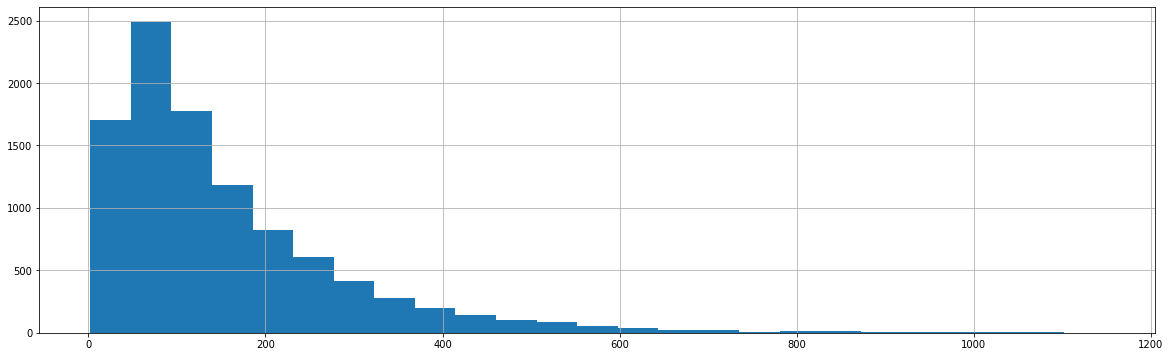

In [15]:
# Histograma
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
review_words_lengths.hist(bins = 25)

## 4. Nubes de palabras

La visualización de los datos siempre es importante, como lo hemos visto. Aunque en algunos casos es importante analizar cosas tales como los histogramas y demás gráficas, en el caso de las palabras las nubes también pueden ser útiles.

In [16]:
#pip install wordcloud

In [17]:
# Se importan las librerías necesarias
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Se juntan las palabras de las reseñas
word_cloud_text = ''.join(data.text)

# Se construye la nube de palabras
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)

# Se construye y se muestra la imagen
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

> **¡Cuidado!** Las nubes de palabras no son siempre la mejor opción, pero ayudan a obtener cierta información de manera rápida y didáctica. Esto puede servir para demostrar rápidamente cuáles son las palabras más repetidas en el texto que estamos analizando. No obstante, en algunas ocasiones puede ser difícil obtener conclusiones estructuradas con este tipo de visualización.

Ahora hagamos una nube de palabras que muestre una nube de palabras a partir de su calificación:

In [ ]:
# Se mejora la resolución para una mejor visualización
from pylab import rcParams
rcParams['figure.figsize'] = 30, 60

def word_cloud_rating(data,star_value):
    
    data_filtered = data[data.stars == star_value] # Se filtra para la estrella deseada
    Reviews = data_filtered.text

    Reviews_text = ' '.join(Reviews.values) # Juntando todas las palabras

    # Se crea la nube de palabras
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(Reviews_text)


    # Se crea y se muestra la imagen
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
word_cloud_rating(data, 1)

Si analizamos la nube de palabras, la palabra "good" (lo que se podría traducir como "bueno", en español) aparece repetitivamente en las reseñas con una estrella, lo que parece contraproducente. Echemos un vistazo al respecto:

In [18]:
# Obtenemos aquellos textos que tienen una estrella y la palabra "good"
reviews_containing_good = [each for each in data[data.stars == 1].text if 'good' in each]

for review in reviews_containing_good[:20]:
    good_index = review.find("good") # Se encuentra el índice de la palabra
    print(review[good_index-20:good_index+20].replace("\n", "")) # Se imprime los 20 caracteres antes y después

 NYC, we had really good ramen. listen
nd thought it sound good. First of all, 
 furniture might be good price but not w
d Centre and it was good. Sheppard Cen
cations. Always had good experiences at 
e?" He said it was "good". This really s
irst time was quite good, but the second
l it into something good. I asked that t
s place has so many good reviews. That w
st perplexed by the good reviews of this
g they do have some good regulars. Who, 
ad that's all we're good for apparently.
al, which is always good at any Sambalat
. That is where the good part ends. Ther
eat right that is a good move until they
r food and a pretty good deal for the pr
urself does it make good business sense 

ew was there was no good place to sit an
ized which is not a good experience. The


### Pequeño ejercicio:

A. ¿Qué vemos?

## 5. N-Grama

Un **N-grama** es una subsecuencia de _n_ elementos de una secuencia de palabras. Es decir, es una conformación de _n_ palabras tras una palabra en específico, contando la palabra. Por ejemplo, para la frase del gran cantautor contemporáneo Benito Martínez:

<center> "Yo le hablo a Dios y tú eres su respuesta" </center>

Se puede obtener los siguiente n-gramas:

* **Unigrama**: "Yo", "Le", "Hablo", entre otros. En este caso `n=1`.
* **Bigrama**: "Yo le", "le hablo", "hablo a", "a Dios", entre otros. En este caso `n=2`.
* **Trigrama**: "Yo le hablo", "le hablo a", "hablo a Dios", entre otros. En este caso `n=3`.

Los restantes n-gramas se basan en la cantidad de palabras que ustedes decidan utilizar al cambiar la _n_ como parámetro.

Esta forma de organización del lenguaje natural ayuda a manejar la estructura de una frase de mejor manera, permitiendo capturar mejor el contexto e intención de la frase. Esto resulta sorpresivamente útil para entrenar modelos de una manera más eficiente en comparación con el uso de una sola palabra como unidad básica. Sin embargo, la dimensionalidad puede crecer sorpresivamente y peligrosamente.

> **Nota:** en este caso, el "grama" o "gramo" que escogimos son las palabras. También se puede utilizar como unidad básica los caracteres, letras, sílabas, entre otros.

### 5.1. Conteo de n-gramas

El conteo de n-gramas ayuda mucho a entender mejor la estructura de un texto. Por ejemplo, podemos ver cuál es la repetición de una palabra (unigrama), dos palabras (bigramas) o tres palabras (trigramas). También se puede analizar desde estructuras aún más grandes y complejas.

Normalmente se crea una matriz de co-ocurrencia de palabras, en la que se especifica un "1" si la palabra $W$ ocurre en un documento $X$, y "0" si no. Creemos una básica:

In [19]:
# TSe importa el módulo a utilizar
from sklearn.feature_extraction.text import CountVectorizer

# Se crea la matriz
vec = CountVectorizer()

# Se transforma y cuentan todas las palabras en los textos
X = vec.fit_transform(AllReviews)

# Se crea una matriz en Pandas para visualización
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df.head()

C:\Users\JM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0014,00429,00a,00am,00p,00pm,01,0146,...,可能說中文啊,在拉斯维加斯买了新房子,布艺隔热性不强,所以用了实木的百叶窗,推荐卓越窗帘给大家,本来想安装布艺窗帘,知道拉斯维加斯特别热,而且价格实惠,隔热,非常漂亮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Pequeño ejercicio:

Encontremos las 15 palabras que más se repiten y las 15 que menos se repiten.

In [20]:
from collections import Counter

all_reviews_text = ' '.join(AllReviews) # Junta todo en una cadena de palabras
tokenized_words = nltk.word_tokenize(all_reviews_text) # Se tokenizan
word_freq = Counter(tokenized_words)

len(word_freq)

KeyboardInterrupt: 

In [ ]:
word_freq.most_common(15) # Se muestran las 15 primeras palabras

In [ ]:
word_freq.most_common()[-15:-1]

Ahora ustedes encuentren los bigramas que más se repiten (**Nota:** utilicen el método `ngrams` de `nltk.util`):

In [21]:
from nltk.util import ngrams

first_5_revs = data.text[0:5]
word_tokens = nltk.word_tokenize(''.join(first_5_revs))
list(ngrams(word_tokens, 2)) #ngrams(word_tokens,n) gives the n-grams.

[('Super', 'simple'),
 ('simple', 'place'),
 ('place', 'but'),
 ('but', 'amazing'),
 ('amazing', 'nonetheless'),
 ('nonetheless', '.'),
 ('.', 'It'),
 ('It', "'s"),
 ("'s", 'been'),
 ('been', 'around'),
 ('around', 'since'),
 ('since', 'the'),
 ('the', '30'),
 ('30', "'s"),
 ("'s", 'and'),
 ('and', 'they'),
 ('they', 'still'),
 ('still', 'serve'),
 ('serve', 'the'),
 ('the', 'same'),
 ('same', 'thing'),
 ('thing', 'they'),
 ('they', 'started'),
 ('started', 'with'),
 ('with', ':'),
 (':', 'a'),
 ('a', 'bologna'),
 ('bologna', 'and'),
 ('and', 'salami'),
 ('salami', 'sandwich'),
 ('sandwich', 'with'),
 ('with', 'mustard'),
 ('mustard', '.'),
 ('.', 'Staff'),
 ('Staff', 'was'),
 ('was', 'very'),
 ('very', 'helpful'),
 ('helpful', 'and'),
 ('and', 'friendly.Small'),
 ('friendly.Small', 'unassuming'),
 ('unassuming', 'place'),
 ('place', 'that'),
 ('that', 'changes'),
 ('changes', 'their'),
 ('their', 'menu'),
 ('menu', 'every'),
 ('every', 'so'),
 ('so', 'often'),
 ('often', '.'),
 ('.', 

### 6. Stopwords (Palabras vacías)

Como hemos visto, hay un grupo de palabras que se repiten constantemente, pero que no aportan mucho acerca del fondo del mensaje que se quiere emitir. Estas son palabras necesarias para la construcción del lenguaje natural entre humanos, pero puede confundir el análisis de las máquinas. Estas palabras son pronombres como "yo", "él", "ella"; preposiciones como "y", "pero"; artículos como "la", "le", "lo", entre otros. Estas palabras son relativamente vacías, por lo que se le llaman "palabras vacías" en español y "stopwords" en inglés.

Por esta razón es común preprocesar los textos para remover este tipo de palabras que no agregan mucho al análisis. Inclusive removerlas puede permitirnos revisan n-gramas de manera más eficiente y efectiva.

La librería `nltk` tiene, precisamente, una lista de palabras vacías (_stopwords_) predeterminadas:

In [22]:
# Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Palabras vacías
print(stopwords.words("spanish"))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

Utilicemos esto para remover aquello que no es importante para nosotros en la primera reseña:

In [24]:
stop_words = set(stopwords.words("english"))
without_stop_words = []
stopword = []
sentence = data.text[0]
words = nltk.word_tokenize(sentence)
for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print(stopword)
print()
print(without_stop_words)

['but', 'been', 'the', 'and', 'they', 'the', 'same', 'they', 'with', 'a', 'and', 'with', 'was', 'very', 'and']

['Super', 'simple', 'place', 'amazing', 'nonetheless', '.', 'It', "'s", 'around', 'since', '30', "'s", 'still', 'serve', 'thing', 'started', ':', 'bologna', 'salami', 'sandwich', 'mustard', '.', 'Staff', 'helpful', 'friendly', '.']


### Pequeño ejercicio

Utilizando la siguiente función:

In [25]:
from nltk.util import ngrams

def top_k_ngrams(word_tokens,n,k):
    
    ## Getting them as n-grams
    n_gram_list = list(ngrams(word_tokens, n))

    ### Getting each n-gram as a separate string
    n_gram_strings = [' '.join(each) for each in n_gram_list]
    
    n_gram_counter = Counter(n_gram_strings)
    most_common_k = n_gram_counter.most_common(k)
    print(most_common_k)
    
   # x_pos = [k for k,v in most_common_k]
   # y_pos = [v for k,v in most_common_k]
    
   # plt.bar(x_pos, y_pos,align='center')

Encuentre las palabras más repetidas sin las palabras vacías.

In [26]:
# Removing the most basic stop words from the ntlk corpus and including only those
# words with character size above 2 so as to remove punctuations
# But, this could be extended to remove further high and low frequency stop words

from nltk.corpus import stopwords
import string
eng_stopwords = stopwords.words('english')

### Getting a single string
all_reviews_text = ' '.join(top_1000_reviews)

## Splitting them into tokens
word_tokens = nltk.word_tokenize(all_reviews_text)

## Removing the stopwords
word_tokens_clean = [each for each in word_tokens if each.lower() not in eng_stopwords and len(each.lower()) > 2]

## Calling the function for top k
top_k_ngrams(word_tokens_clean, 3, 10)

NameError: name 'top_1000_reviews' is not defined